In [1]:
import pandas as pd

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime

In [4]:
ebola=pd.read_csv('../data/country_timeseries.csv')

In [5]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [6]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [7]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [8]:
### date is not codified as a datetime, this is not optimal

## As usual we cast it to datetime

In [9]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

## Set as index
### in the case of panel data it is most convenient to define time based indexes

In [10]:
ebola.set_index('date_dt',inplace=True)

In [11]:
ebola.sort_index(inplace=True)

In [12]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
date_dt,,,,,,,,,,,,,,,,,,
2014-03-22,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-26,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-27,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN


In [13]:
dataToPlot=ebola[['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali']]


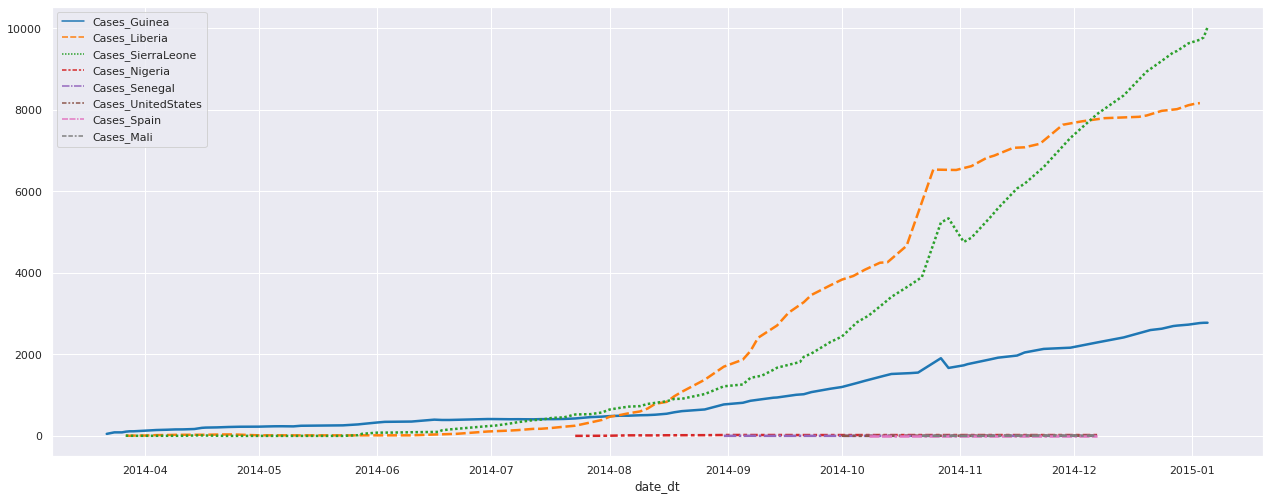

In [14]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot(data=dataToPlot, palette="tab10", linewidth=2.5)

## Resampling 

In [24]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-4-30']

,Cases_Guinea
date_dt,
2014-04-01,127.0
2014-04-04,143.0
2014-04-07,151.0
2014-04-09,158.0
2014-04-11,159.0
2014-04-14,168.0
2014-04-15,NaN
2014-04-16,197.0
2014-04-17,203.0


In [41]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-4-30'].resample("W").mean()

,Cases_Guinea
date_dt,
2014-04-06,135.0
2014-04-13,156.0
2014-04-20,194.0
2014-04-27,221.0


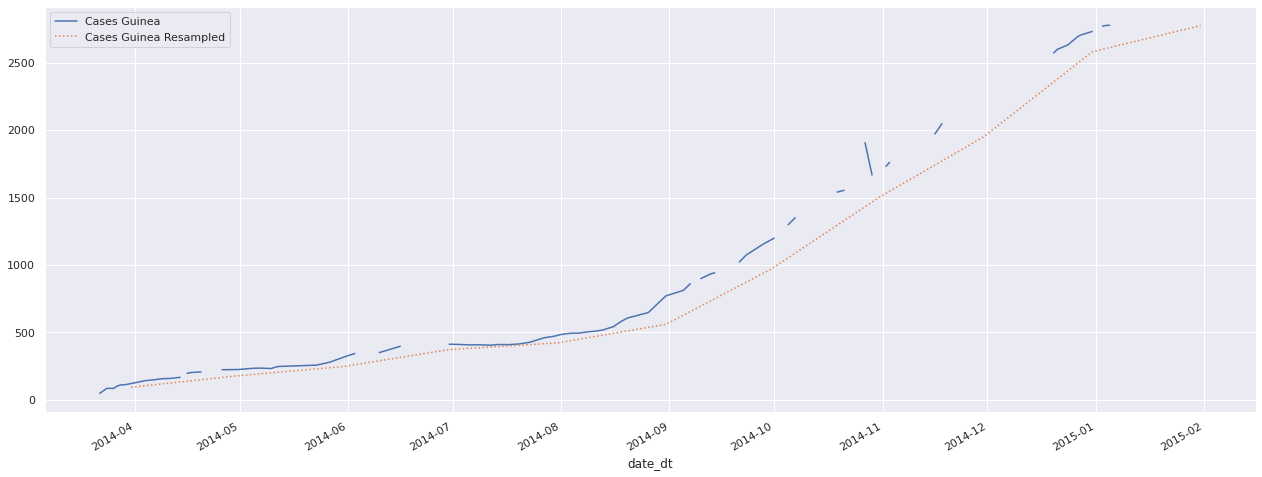

In [60]:
fig, ax = plt.subplots()
ebola[['Cases_Guinea']].plot( style='-',ax=ax)
ebola[['Cases_Guinea']].resample("M").mean().plot(style=':',ax=ax)

plt.legend(['Cases Guinea', 'Cases Guinea Resampled'])
plt.show()

### Interpolation
### sometimes we have missing data, pandas offers suppport to interpolare

In [61]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-4-30']

,Cases_Guinea
date_dt,
2014-04-01,127.0
2014-04-04,143.0
2014-04-07,151.0
2014-04-09,158.0
2014-04-11,159.0
2014-04-14,168.0
2014-04-15,NaN
2014-04-16,197.0
2014-04-17,203.0


In [62]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-4-30'].interpolate()

,Cases_Guinea
date_dt,
2014-04-01,127.000000
2014-04-04,143.000000
2014-04-07,151.000000
2014-04-09,158.000000
2014-04-11,159.000000
2014-04-14,168.000000
2014-04-15,182.500000
2014-04-16,197.000000
2014-04-17,203.000000


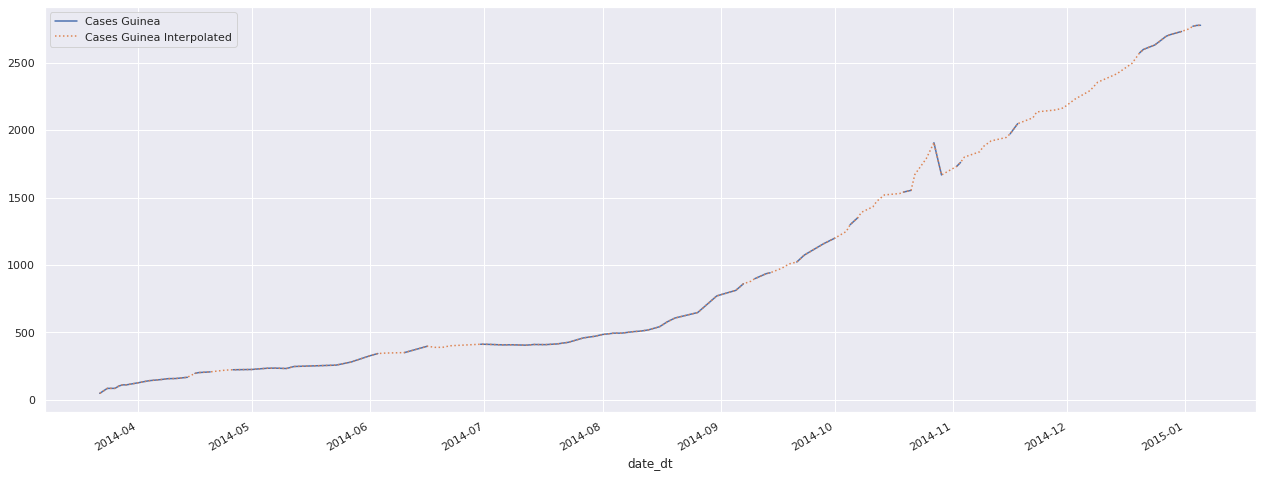

In [63]:
fig, ax = plt.subplots()
ebola[['Cases_Guinea']].plot( style='-',ax=ax)
ebola[['Cases_Guinea']].interpolate().plot(style=':',ax=ax)

plt.legend(['Cases Guinea', 'Cases Guinea Interpolated'])
plt.show()